In [1]:
import casadi as ca
import numpy as np
import matplotlib.pyplot as plt
import control
import collections
import pandas as pd

In [2]:
sting_data_5ms = pd.read_csv('Aero_Test_Stings_5ms.txt', sep = "\t", header = None)
sting_data_10ms = pd.read_csv('Aero_Test_Stings_10ms.txt', sep = "\t", header = None)
aero_test_5ms = pd.read_csv('Aero_Test_5ms.txt', sep = "\t", header = None)
aero_test_10ms = pd.read_csv('Aero_Test_10ms.txt', sep = "\t", header = None)
sting_data_5ms.columns = ['','Pitot Pressure','Wind Speed (m/s)','Abs AOA','Drag','Lift','Pitch','Roll','F0','F1','F2','F3']
sting_data_5ms

,,Pitot Pressure,Wind Speed (m/s),Abs AOA,Drag,Lift,Pitch,Roll,F0,F1,F2,F3
0,0.066463,24.394239,4.961564,0.0,0.003228,-0.025458,0.072690,-0.015926,0.003228,-0.007878,0.008049,-0.025629
1,0.067871,24.394763,4.962044,0.0,0.001158,-0.010659,0.052359,-0.018183,0.001158,-0.004568,0.013615,-0.019707


In [3]:
sting_data_10ms.columns = ['','Pitot Pressure','Wind Speed (m/s)','Abs AOA','Drag','Lift','Pitch','Roll','F0','F1','F2','F3']
sting_data_10ms

,,Pitot Pressure,Wind Speed (m/s),Abs AOA,Drag,Lift,Pitch,Roll,F0,F1,F2,F3
0,0.243066,24.522381,10.033261,0.0,0.016653,0.028931,0.198264,-0.070762,0.016653,0.009844,0.080607,-0.061520
1,0.242347,24.527576,10.022862,0.0,0.019158,0.039741,0.189606,-0.075789,0.019158,0.009666,0.085455,-0.055381


In [4]:
aero_test_5ms.columns = ['','Pitot Pressure','Wind Speed (m/s)','Abs AOA','Drag','Lift','Pitch','Roll','F0','F1','F2','F3']
aero_test_5ms

,,Pitot Pressure,Wind Speed (m/s),Abs AOA,Drag,Lift,Pitch,Roll,F0,F1,F2,F3
0,0.068209,24.206949,4.965038,0.0,0.055807,0.103467,0.290141,0.002974,0.055807,0.081447,0.078474,-0.056454
1,0.069443,24.243261,5.014635,2.0,0.070873,0.211153,0.392594,0.014107,0.070873,0.153303,0.139196,-0.081345
2,0.069245,24.245791,5.016780,4.0,0.095762,0.306551,0.542574,-0.003519,0.095762,0.208894,0.212413,-0.114755
3,0.067820,24.250168,5.016808,6.0,0.142462,0.380513,0.814690,-0.032154,0.142462,0.261043,0.293197,-0.173726
4,0.068392,24.258054,5.007809,8.0,0.194708,0.419166,1.108003,-0.030237,0.194708,0.312091,0.342329,-0.235254
5,0.068102,24.263196,5.017172,10.0,0.256541,0.443073,1.453146,-0.037346,0.256541,0.356500,0.393846,-0.307273
6,0.068464,24.262290,4.964981,-2.0,0.058056,-0.014414,0.274078,0.009495,0.058056,0.021354,0.011859,-0.047627
7,0.068198,24.265092,4.939145,-4.0,0.072530,-0.132667,0.317532,0.022525,0.072530,-0.030296,-0.052821,-0.049551
8,0.066795,24.268971,4.916974,-6.0,0.103705,-0.220318,0.448404,0.028143,0.103705,-0.061785,-0.089928,-0.068605
9,0.068434,24.271850,4.917874,-8.0,0.142466,-0.292559,0.620078,0.029440,0.142466,-0.083621,-0.113061,-0.095877


In [5]:
aero_test_10ms.columns = ['','Pitot Pressure','Wind Speed (m/s)','Abs AOA','Drag','Lift','Pitch','Roll','F0','F1','F2','F3']
aero_test_10ms

,,Pitot Pressure,Wind Speed (m/s),Abs AOA,Drag,Lift,Pitch,Roll,F0,F1,F2,F3
0,0.240579,24.433911,9.974355,0.0,0.206269,0.456143,1.049237,0.040689,0.206269,0.348116,0.307427,-0.199399
1,0.240904,24.460488,9.998722,2.0,0.255459,0.902360,1.341585,0.030738,0.255459,0.598451,0.567713,-0.263804
2,0.241404,24.468884,9.998460,4.0,0.343053,1.291990,1.853894,-0.023198,0.343053,0.821985,0.845183,-0.375177
3,0.240299,24.484355,9.998653,6.0,0.538892,1.591951,2.906456,-0.145055,0.538892,1.016971,1.162026,-0.587046
4,0.239913,24.491807,9.998489,8.0,0.756909,1.750928,4.136263,-0.099075,0.756909,1.248990,1.348065,-0.846126
5,0.240687,24.497126,9.989233,10.0,1.005390,1.844592,5.461289,-0.164402,1.005390,1.395475,1.559877,-1.110759
6,0.239108,24.513545,9.949050,-2.0,0.204680,0.018800,0.986645,0.061611,0.204680,0.128235,0.066624,-0.176060
7,0.237891,24.522805,9.922778,-4.0,0.258190,-0.452804,1.235019,0.094068,0.258190,-0.070238,-0.164305,-0.218261
8,0.237800,24.533398,9.882190,-6.0,0.370899,-0.876443,1.782381,0.129453,0.370899,-0.215079,-0.344532,-0.316833
9,0.235823,24.540122,9.854879,-8.0,0.539099,-1.184203,2.613678,0.135332,0.539099,-0.289579,-0.424911,-0.469713


In [6]:
rho = 1.225
lb2N = 4.448221615
S = 0.14709648

vaero5 = aero_test_5ms['Wind Speed (m/s)']
vaero10 = aero_test_10ms['Wind Speed (m/s)']

LiftStingData5 = sting_data_5ms['Lift']
LiftSting5 = (LiftStingData5[0] + LiftStingData5[1])/2
DragStingData5 = sting_data_5ms['Drag']
DragSting5 = (DragStingData5[0] + DragStingData5[1])/2

LiftStingData10 = sting_data_10ms['Lift']
LiftSting10 = (LiftStingData10[0] + LiftStingData10[1])/2
DragStingData10 = sting_data_10ms['Drag']
DragSting10 = (DragStingData10[0] + DragStingData10[1])/2

Lift5 = aero_test_5ms['Lift']
Drag5 = aero_test_5ms['Drag']
Lift10 = aero_test_10ms['Lift']
Drag10 = aero_test_10ms['Drag']

In [7]:
q5 = 0.5*rho*vaero5*vaero5
q10 = 0.5*rho*vaero10*vaero10;
CD5 = (Drag5-DragSting5)*lb2N/(q5*S)
CD10 = (Drag10-DragSting10)*lb2N/(q10*S)
CL5 = (Lift5-LiftSting5)*lb2N/(q5*S)
CL10 = (Lift10-LiftSting10)*lb2N/(q10*S)

In [8]:
alpha_slope = 2.260509488;
alpha_0 = 3.964867942;
alpha = np.array([0,2,4,6,8,10,-2,-4,-6,-8,-10])
alpha = alpha*alpha_slope + alpha_0 

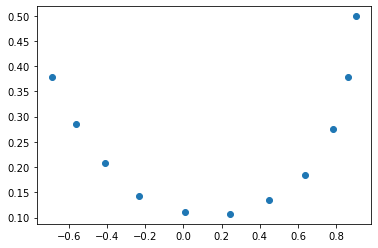

In [9]:
plt.plot(CL5,CD5,'o')

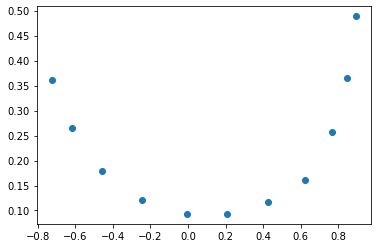

In [10]:
plt.plot(CL10,CD10,'o')

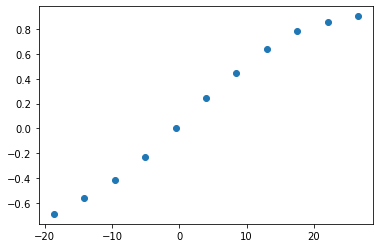

In [11]:
plt.plot(alpha,CL5,'o')

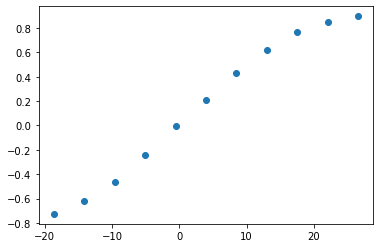

In [12]:
plt.plot(alpha,CL10,'o')

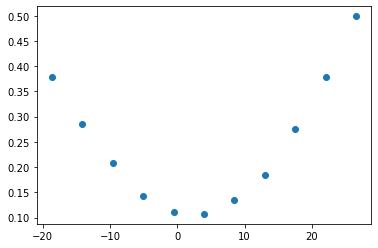

In [13]:
plt.plot(alpha,CD5,'o')

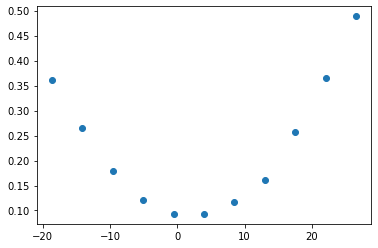

In [14]:
plt.plot(alpha,CD10,'o')

In [15]:
CL5_slopes = [0,0,0,0,0,0,0,0,0,0]
CL10_slopes = [0,0,0,0,0,0,0,0,0,0]
CD5_slopes = [0,0,0,0,0,0,0,0,0,0]
CD10_slopes = [0,0,0,0,0,0,0,0,0,0]

for i in range(6):
    CL5_slopes[i] = (CL5[i+1] - CL5[i])/(alpha[i+1]-alpha[i])
    CL5_slopes[i+4] = (CL5[i+4] - CL5[i+3])/(alpha[i+4]-alpha[3])
for i in range(6):
    CL10_slopes[i] = (CL10[i+1] - CL10[i])/(alpha[i+1]-alpha[i])
    CL10_slopes[i+4] = (CL10[i+4] - CL10[i+3])/(alpha[i+4]-alpha[3])
for i in range(6):
    CD5_slopes[i] = (CD5[i+1] - CD5[i])/(alpha[i+1]-alpha[i])
    CD5_slopes[i+4] = (CD5[i+4] - CD5[i+3])/(alpha[i+4]-alpha[3])
for i in range(6):
    CD10_slopes[i] = (CD10[i+1] - CD10[i])/(alpha[i+1]-alpha[i])
    CD10_slopes[i+4] = (CD10[i+4] - CD10[i+3])/(alpha[i+4]-alpha[3])

In [16]:
CL5_slope_mean = np.mean(CL5_slopes)
CL10_slope_mean = np.mean(CL10_slopes)
CD5_slope_mean = np.mean(CD5_slopes)
CD10_slope_mean = np.mean(CD10_slopes)

In [18]:
CL5_0 = CL5[0] - alpha_0 * CL5_slope_mean
CL10_0 = CL10[0] - alpha_0 * CL10_slope_mean
CD5_0 = CD5[0] - alpha_0 * CD5_slope_mean
CD10_0 = CD10[0] - alpha_0 * CD10_slope_mean

a = ca.SX.sym('a')
CL5_eq = CL5_slope_mean*a-CL5_0
CL10_eq = CL10_slope_mean*a-CL10_0
CD5_eq = CD5_slope_mean*a-CD5_0
CD10_eq = CD10_slope_mean*a-CD10_0

In [19]:
CL5_eq

SX(((0.0250818*a)-0.143942))

In [20]:
CL10_eq

SX(((0.0258534*a)-0.106821))

In [21]:
CD5_eq

SX(((0.011602*a)-0.0613775))

In [22]:
CD10_eq

SX(((0.0117759*a)-0.0467873))